In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import pandas as pd
import seaborn as sns

In [5]:
def climo(ds):
    ds_climo = ds.groupby('time.month').mean(dim='time') # Calculating the climatology
    return ds_climo
def anoms(ds):
    ds_climo= ds.groupby('time.month').mean(dim='time') # Calculating the anomalies
    ds_anoms = ds.groupby('time.month')-ds_climo
    return ds_anoms

#### Read in monthly Soil Moisture data

In [6]:
file = '/scratch/ntavakol/ntavakol/CCI_Final/CCI_Lon_Monthly.nc'
ds_sm = xr.open_dataset(file)
ds_sm

<xarray.Dataset>
Dimensions:    (time: 120, bnds: 2, lon: 1440, lat: 600)
Coordinates:
  * time       (time) datetime64[ns] 2011-01-16 ... 2020-12-16
  * lon        (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat        (lat) float64 89.88 89.62 89.38 89.12 ... -59.38 -59.62 -59.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    sm         (time, lat, lon) float32 ...
Attributes: (12/47)
    CDI:                          Climate Data Interface version 1.9.10 (http...
    Conventions:                  CF-1.9
    source:                       WARP 5.5R1.1/AMI-WS/ERS12 Level 2 Soil Mois...
    institution:                  TU Wien (AUT); VanderSat B.V. (NL)
    title:                        ESA CCI Surface Soil Moisture COMBINED acti...
    contact:                      cci_sm_contact@eodc.eu
    ...                           ...
    geospatial_lon_resolution:    0.25 degree
    spatial_resolution:           25km
    time_coverage_start:          20110101T000000Z
    time_coverage_end:            20110101T235959Z
    frequency:                    mon
    CDO:                          Climate Data Operators version 1.9.10 (http...

##### Selecting Case study (Australia)

In [7]:
ds_sm1=ds_sm.sel(lon=slice(113,154),lat=slice(-10,-44))
ds_sm1

<xarray.Dataset>
Dimensions:    (time: 120, bnds: 2, lon: 164, lat: 136)
Coordinates:
  * time       (time) datetime64[ns] 2011-01-16 ... 2020-12-16
  * lon        (lon) float64 113.1 113.4 113.6 113.9 ... 153.1 153.4 153.6 153.9
  * lat        (lat) float64 -10.12 -10.38 -10.62 ... -43.38 -43.62 -43.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 2011-01-01 2011-01-31 ... 2020-12-31
    sm         (time, lat, lon) float32 ...
Attributes: (12/47)
    CDI:                          Climate Data Interface version 1.9.10 (http...
    Conventions:                  CF-1.9
    source:                       WARP 5.5R1.1/AMI-WS/ERS12 Level 2 Soil Mois...
    institution:                  TU Wien (AUT); VanderSat B.V. (NL)
    title:                        ESA CCI Surface Soil Moisture COMBINED acti...
    contact:                      cci_sm_contact@eodc.eu
    ...                           ...
    geospatial_lon_resolution:    0.25 degree
    spatial_resolution:           25km
    time_coverage_start:          20110101T000000Z
    time_coverage_end:            20110101T235959Z
    frequency:                    mon
    CDO:                          Climate Data Operators version 1.9.10 (http...

#### Calculating the climatology for monthly averaged soil moisture data

In [37]:
ds_climo = climo(ds_sm1)
ds_climo

<xarray.Dataset>
Dimensions:  (lon: 164, lat: 136, month: 12)
Coordinates:
  * lon      (lon) float64 113.1 113.4 113.6 113.9 ... 153.1 153.4 153.6 153.9
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -43.38 -43.62 -43.88
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sm       (month, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

#### Calculating Anomalies by subtracting the climatology from the original data

In [39]:
ds_anoms = anoms(ds_sm1)
ds_anoms

<xarray.Dataset>
Dimensions:  (time: 120, lon: 164, lat: 136)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-16 2011-02-14T12:00:00 ... 2020-12-16
  * lon      (lon) float64 113.1 113.4 113.6 113.9 ... 153.1 153.4 153.6 153.9
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -43.38 -43.62 -43.88
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sm       (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

#### Substituting time dimension with string

##### The time dimension of soil moisture data and SOI index are different, so in order to match them, we will substitute the time dimension with strings.

In [40]:
ds_anoms['time']=['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
                 '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
                 '2013-01-01', '2013-02-010', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
                 '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
                 '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
                 '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
                 '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
                 '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
                 '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
                 '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-010', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01']

In [41]:
ds_anoms

<xarray.Dataset>
Dimensions:  (time: 120, lon: 164, lat: 136)
Coordinates:
  * time     (time) <U11 '2011-01-01' '2011-02-01' ... '2020-11-01' '2020-12-01'
  * lon      (lon) float64 113.1 113.4 113.6 113.9 ... 153.1 153.4 153.6 153.9
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -43.38 -43.62 -43.88
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sm       (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

#### Read in monthly Southern Oscillation Index data

In [42]:
file = "/home/ntavakol/Assignment3/SOI.csv"
df = pd.read_csv(file)
df

,YEAR,MONTH,SOI
0,2011,1,1.7
1,2011,2,2.0
2,2011,3,1.8
3,2011,4,1.2
4,2011,5,0.4
...,...,...,...
115,2020,8,1.0
116,2020,9,1.3
117,2020,10,0.8
118,2020,11,1.1


#### Converting CSV file into an xarray. Dataset

In [43]:
start_date=str(df.YEAR[0])+'-'+str(df.MONTH[0])+'-01'
end_date=str(df.YEAR[119])+'-'+str(df.MONTH[119])+'-01'
print(start_date)
print(end_date)

2011-1-01
2020-12-01


In [44]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=120, freq='MS')

In [45]:
ds_index=xr.DataArray(df['SOI'],
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='SOI')
ds_index

<xarray.Dataset>
Dimensions:  (time: 120)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
Data variables:
    SOI      (time) float64 1.7 2.0 1.8 1.2 0.4 0.6 ... 0.6 1.0 1.3 0.8 1.1 1.4

#### Plotting monthly SOI from 2011 to 2020

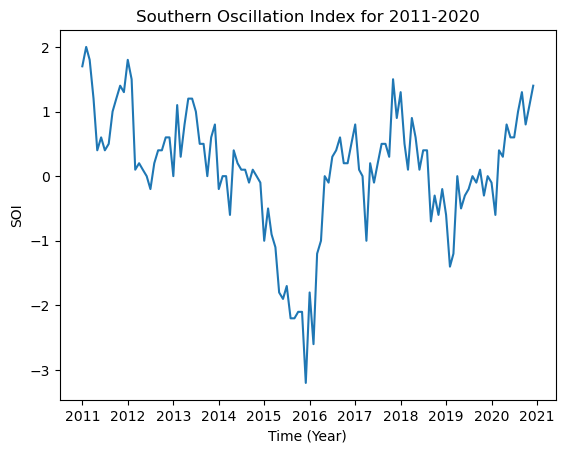

In [46]:
plt.plot(ds_index['time'],ds_index['SOI']) 
plt.title('Southern Oscillation Index for 2011-2020')
plt.ylabel('SOI')
plt.xlabel('Time (Year)')
plt.savefig('Southern Oscillation Index for 2011-2020.png', dpi=300, bbox_inches='tight');

#### Calculating 15 and 85 percentages of SOI to determine a threshold for El Nino, La Nino, and Neutral phases

In [47]:
np.quantile(ds_index['SOI'], 0.15)

-0.7300000000000004

In [48]:
np.quantile(ds_index['SOI'], 0.85)

1.0

In [49]:
elnino = ds_index['SOI'].where(ds_index['SOI']<=-0.73)
lanina = ds_index['SOI'].where(ds_index['SOI']>=1.0)
neutral=ds_index['SOI'].where((ds_index['SOI']>-0.73) & (ds_index['SOI']<1.0))

In [50]:
elnino

<xarray.DataArray 'SOI' (time: 120)>
array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan, -1. ,  nan, -0.9, -1.1, -1.8, -1.9, -1.7,
       -2.2, -2.2, -2.1, -2.1, -3.2, -1.8, -2.6, -1.2, -1. ,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, -1. ,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, -1.4, -1.2,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01

In [51]:
lanina

<xarray.DataArray 'SOI' (time: 120)>
array([1.7, 2. , 1.8, 1.2, nan, nan, nan, nan, 1. , 1.2, 1.4, 1.3, 1.8,
       1.5, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.1,
       nan, nan, 1.2, 1.2, 1. , nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, 1.5, nan, 1.3, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1. , 1.3,
       nan, 1.1, 1.4])
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01

In [52]:
neutral

<xarray.DataArray 'SOI' (time: 120)>
array([ nan,  nan,  nan,  nan,  0.4,  0.6,  0.4,  0.5,  nan,  nan,  nan,
        nan,  nan,  nan,  0.1,  0.2,  0.1,  0. , -0.2,  0.2,  0.4,  0.4,
        0.6,  0.6,  0. ,  nan,  0.3,  0.8,  nan,  nan,  nan,  0.5,  0.5,
        0. ,  0.6,  0.8, -0.2,  0. ,  0. , -0.6,  0.4,  0.2,  0.1,  0.1,
       -0.1,  0.1,  0. , -0.1,  nan, -0.5,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  0. , -0.1,
        0.3,  0.4,  0.6,  0.2,  0.2,  0.5,  0.8,  0.1,  0. ,  nan,  0.2,
       -0.1,  0.2,  0.5,  0.5,  0.3,  nan,  0.9,  nan,  0.5,  0.1,  0.9,
        0.6,  0.1,  0.4,  0.4, -0.7, -0.3, -0.6, -0.2, -0.6,  nan,  nan,
        0. , -0.5, -0.3, -0.2,  0. , -0.1,  0.1, -0.3,  0. , -0.1, -0.6,
        0.4,  0.3,  0.8,  0.6,  0.6,  nan,  nan,  0.8,  nan,  nan])
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01

#### Plotting monthly SOI from 2011 to 2020 showing El Nino, La Nino, and Neutral phases

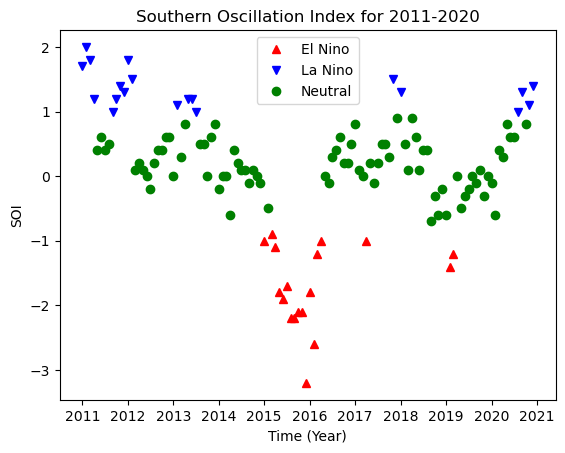

In [53]:
plt.plot(ds_index['time'],elnino,'r^', label="El Nino")
plt.plot(ds_index['time'],lanina,'bv',label="La Nino")
plt.plot(ds_index['time'],neutral,'go',label="Neutral") ;
plt.legend(loc='upper center')
plt.title('Southern Oscillation Index for 2011-2020')
plt.ylabel('SOI')
plt.xlabel('Time (Year)')
plt.savefig('Southern Oscillation Index for 2011-2020_1.png', dpi=300, bbox_inches='tight');

#### How many months do we have with El Nino, La Nina, and Neutral?

In [54]:
print('El Nino: ',elnino.count(dim='time').values)
print('Neutral: ',neutral.count(dim='time').values)
print('La Nina: ',lanina.count(dim='time').values)

counts=[elnino.count(dim='time').values,
        lanina.count(dim='time').values,
        lanina.count(dim='time').values]
print(counts)

El Nino:  18
Neutral:  82
La Nina:  20
[array(18), array(20), array(20)]


#### Plotting monthly SOI from 2011 to 2020 showing El Nino, La Nino, and Neutral phases

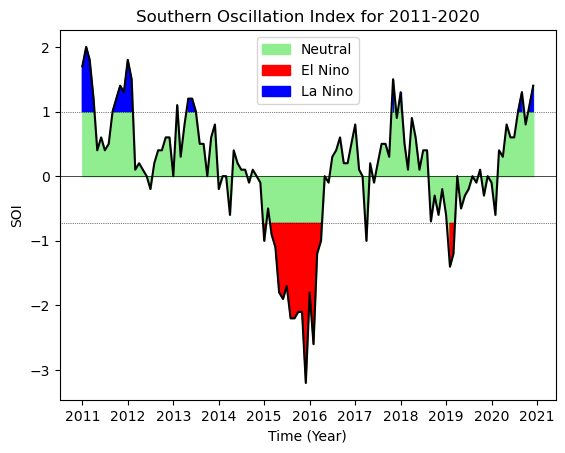

In [55]:
plt.plot(ds_index['time'],df['SOI'],'k')
plt.fill_between(ds_index['time'].values,ds_index['SOI'],color='lightgreen',label="Neutral")
plt.fill_between(ds_index['time'].values,elnino,y2=-0.73,color='red',label="El Nino")
plt.fill_between(ds_index['time'].values,lanina,y2=1.0,color='blue',label="La Nino")
plt.axhline(0,color='black',linewidth=0.5)
plt.axhline(1.0,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-0.73,color='black',linewidth=0.5,linestyle='dotted') 
plt.xlabel("Time (Year)")
plt.ylabel("SOI")
plt.legend(loc='upper center')
plt.title('Southern Oscillation Index for 2011-2020')
plt.savefig('Southern Oscillation Index for 2011-2020_2.png', dpi=300, bbox_inches='tight');

#### Substituting time dimension with string for El Nino

In [56]:
elnino['time']=['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
                 '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
                 '2013-01-01', '2013-02-010', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
                 '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
                 '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
                 '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
                 '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
                 '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
                 '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
                 '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-010', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01']

In [57]:
elnino

<xarray.DataArray 'SOI' (time: 120)>
array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan, -1. ,  nan, -0.9, -1.1, -1.8, -1.9, -1.7,
       -2.2, -2.2, -2.1, -2.1, -3.2, -1.8, -2.6, -1.2, -1. ,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, -1. ,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, -1.4, -1.2,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])
Coordinates:
  * time     (time) <U11 '2011-01-01' '2011-02-01' ... '2020-11-01' '2020-12-01'

#### Substituting time dimension with string for La Nino

In [58]:
lanina['time']=['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
                 '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
                 '2013-01-01', '2013-02-010', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
                 '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
                 '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
                 '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
                 '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
                 '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
                 '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
                 '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-010', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01']

In [59]:
lanina

<xarray.DataArray 'SOI' (time: 120)>
array([1.7, 2. , 1.8, 1.2, nan, nan, nan, nan, 1. , 1.2, 1.4, 1.3, 1.8,
       1.5, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.1,
       nan, nan, 1.2, 1.2, 1. , nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, 1.5, nan, 1.3, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1. , 1.3,
       nan, 1.1, 1.4])
Coordinates:
  * time     (time) <U11 '2011-01-01' '2011-02-01' ... '2020-11-01' '2020-12-01'

#### Substituting time dimension with string for neutral

In [60]:
neutral['time']=['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
                 '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
                 '2013-01-01', '2013-02-010', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
                 '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
                 '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
                 '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
                 '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
                 '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
                 '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
                 '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-010', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01']

In [61]:
neutral

<xarray.DataArray 'SOI' (time: 120)>
array([ nan,  nan,  nan,  nan,  0.4,  0.6,  0.4,  0.5,  nan,  nan,  nan,
        nan,  nan,  nan,  0.1,  0.2,  0.1,  0. , -0.2,  0.2,  0.4,  0.4,
        0.6,  0.6,  0. ,  nan,  0.3,  0.8,  nan,  nan,  nan,  0.5,  0.5,
        0. ,  0.6,  0.8, -0.2,  0. ,  0. , -0.6,  0.4,  0.2,  0.1,  0.1,
       -0.1,  0.1,  0. , -0.1,  nan, -0.5,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  0. , -0.1,
        0.3,  0.4,  0.6,  0.2,  0.2,  0.5,  0.8,  0.1,  0. ,  nan,  0.2,
       -0.1,  0.2,  0.5,  0.5,  0.3,  nan,  0.9,  nan,  0.5,  0.1,  0.9,
        0.6,  0.1,  0.4,  0.4, -0.7, -0.3, -0.6, -0.2, -0.6,  nan,  nan,
        0. , -0.5, -0.3, -0.2,  0. , -0.1,  0.1, -0.3,  0. , -0.1, -0.6,
        0.4,  0.3,  0.8,  0.6,  0.6,  nan,  nan,  0.8,  nan,  nan])
Coordinates:
  * time     (time) <U11 '2011-01-01' '2011-02-01' ... '2020-11-01' '2020-12-01'

### Selecting the dates that match El Nino, La Nina, and Neutral

In [62]:
elnino_sm = ds_anoms.sel(time=elnino.dropna(dim='time')['time']).mean(dim='time')
elnino_sm

<xarray.Dataset>
Dimensions:  (lon: 164, lat: 136)
Coordinates:
  * lon      (lon) float64 113.1 113.4 113.6 113.9 ... 153.1 153.4 153.6 153.9
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -43.38 -43.62 -43.88
Data variables:
    sm       (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [63]:
neutral_sm = ds_anoms.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')
neutral_sm

<xarray.Dataset>
Dimensions:  (lon: 164, lat: 136)
Coordinates:
  * lon      (lon) float64 113.1 113.4 113.6 113.9 ... 153.1 153.4 153.6 153.9
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -43.38 -43.62 -43.88
Data variables:
    sm       (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [64]:
lanina_sm = ds_anoms.sel(time=lanina.dropna(dim='time')['time']).mean(dim='time')
lanina_sm

<xarray.Dataset>
Dimensions:  (lon: 164, lat: 136)
Coordinates:
  * lon      (lon) float64 113.1 113.4 113.6 113.9 ... 153.1 153.4 153.6 153.9
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -43.38 -43.62 -43.88
Data variables:
    sm       (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [65]:
comp_sm = [elnino_sm['sm'],lanina_sm['sm'],neutral_sm['sm']]
comp_sm

[<xarray.DataArray 'sm' (lat: 136, lon: 164)>
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
 Coordinates:
   * lon      (lon) float64 113.1 113.4 113.6 113.9 ... 153.1 153.4 153.6 153.9
   * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -43.38 -43.62 -43.88,
 <xarray.DataArray 'sm' (lat: 136, lon: 164)>
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
 Coordinates:
   * lon      (lon) float64 113.1 113.4 113.6 113.9 ... 153.1 153.4 153.6 153.9
   * lat      (lat) float64 -10.12 -10.3

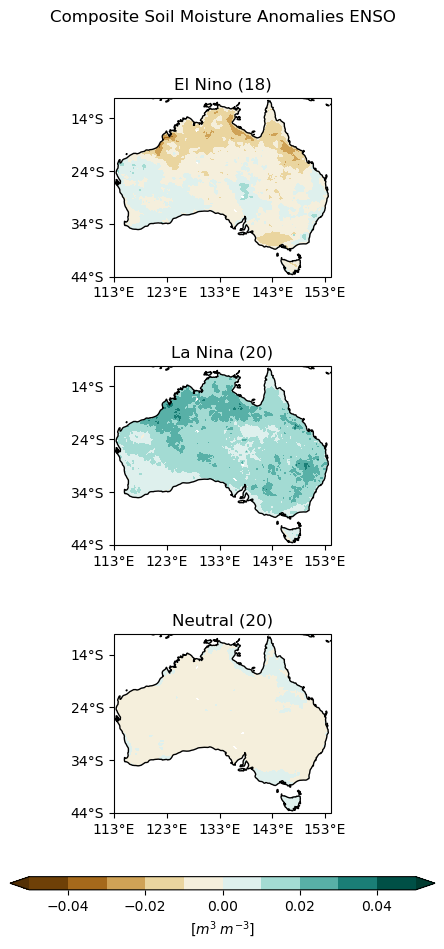

In [68]:
labels=['El Nino','La Nina', 'Neutral']
clevs = np.arange(-0.05,0.06,0.01)
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=11)},
                        figsize=(8.5,11))
# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the seasons and plot
for i,enso in enumerate(comp_sm):

        # Select the season
        data = comp_sm[i]
 # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=comp_sm[i]['lon'])

 # Contour plot
        cs=axs[i].contourf(lons,comp_sm[i]['lat'],data,clevs,
                    transform = ccrs.PlateCarree(),
                    cmap='BrBG',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(113,154,10), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-44,-10,10), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='[$m^{3}\;m^{-3}$]')

# Add a big title at the top
plt.suptitle('Composite Soil Moisture Anomalies ENSO') 
plt.savefig('Composite Soil Moisture Anomalies during ENSO.png', dpi=300, bbox_inches='tight');